In [1]:
%pip install -r requirements.txt


Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys 
print(sys.path)

['/Users/omerfarukbulut/fac', '/Users/omerfarukbulut/miniconda3/lib/python311.zip', '/Users/omerfarukbulut/miniconda3/lib/python3.11', '/Users/omerfarukbulut/miniconda3/lib/python3.11/lib-dynload', '', '/Users/omerfarukbulut/miniconda3/lib/python3.11/site-packages']


In [3]:
import cv2 
import os 
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, Activation

from keras.preprocessing.image import load_img, img_to_array
from tensorflow import keras


In [9]:
picture_size = 48
images = "./images"
EPOCHS = 48
validation_split = 0.2
verbose = 1
pateince = 50
batch_size = 32

In [ ]:
expression = 'happy'
plt.figure(figsize=[12,12])    
for i in range(1,10,1):
    plt.subplot(3,3,i)
    img = cv2.imread(os.path.join(f'./images/train/{expression}',random.choice(os.listdir(f'./images/train/{expression}'))))
    plt.imshow(img)
plt.show()

MAKING TRAINING AND VALIDATION DATA

In [7]:


import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_set = train_datagen.flow_from_directory(
        "./images/train/",
        target_size=(picture_size, picture_size),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')
test_set = test_datagen.flow_from_directory("./images/validation/",
                                            target_size=(picture_size, picture_size),
                                            batch_size=batch_size,
                                            color_mode="grayscale",
                                            class_mode='categorical')

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


MODEL BUILDING

In [10]:
from keras.optimizers import RMSprop,Adam,  SGD



class_no = 7

model = Sequential()
# 1 - Convolution
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(class_no, activation='softmax'))

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

In [11]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model_weights.keras", monitor='val_accuracy',verbose=1, save_best_only=True, mode='max')

earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=3, verbose=1, restore_best_weights=True)    

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, verbose=1, min_delta=0.0001)

CALLBACKS = [earlystop, checkpoint, reduce_lr]




In [12]:


steps_per_epoch = train_set.n // batch_size
validation_steps = test_set.n // batch_size

history = model.fit(x=train_set, steps_per_epoch=steps_per_epoch, epochs=EPOCHS, validation_data=test_set, validation_steps=validation_steps , callbacks=CALLBACKS)


Epoch 1/48
225/225 [==============================] - ETA: 0s - loss: 2.0029 - accuracy: 0.2326
Epoch 1: val_accuracy improved from -inf to 0.22131, saving model to model_weights.keras
225/225 [==============================] - 290s 1s/step - loss: 2.0029 - accuracy: 0.2326 - val_loss: 1.8891 - val_accuracy: 0.2213 - lr: 1.0000e-04
Epoch 2/48
225/225 [==============================] - ETA: 0s - loss: 1.8461 - accuracy: 0.2845
Epoch 2: val_accuracy improved from 0.22131 to 0.29759, saving model to model_weights.keras
225/225 [==============================] - 320s 1s/step - loss: 1.8461 - accuracy: 0.2845 - val_loss: 1.8405 - val_accuracy: 0.2976 - lr: 1.0000e-04
Epoch 3/48
225/225 [==============================] - ETA: 0s - loss: 1.7420 - accuracy: 0.3302
Epoch 3: val_accuracy improved from 0.29759 to 0.33210, saving model to model_weights.keras
225/225 [==============================] - 332s 1s/step - loss: 1.7420 - accuracy: 0.3302 - val_loss: 1.7589 - val_accuracy: 0.3321 - lr: 1.0

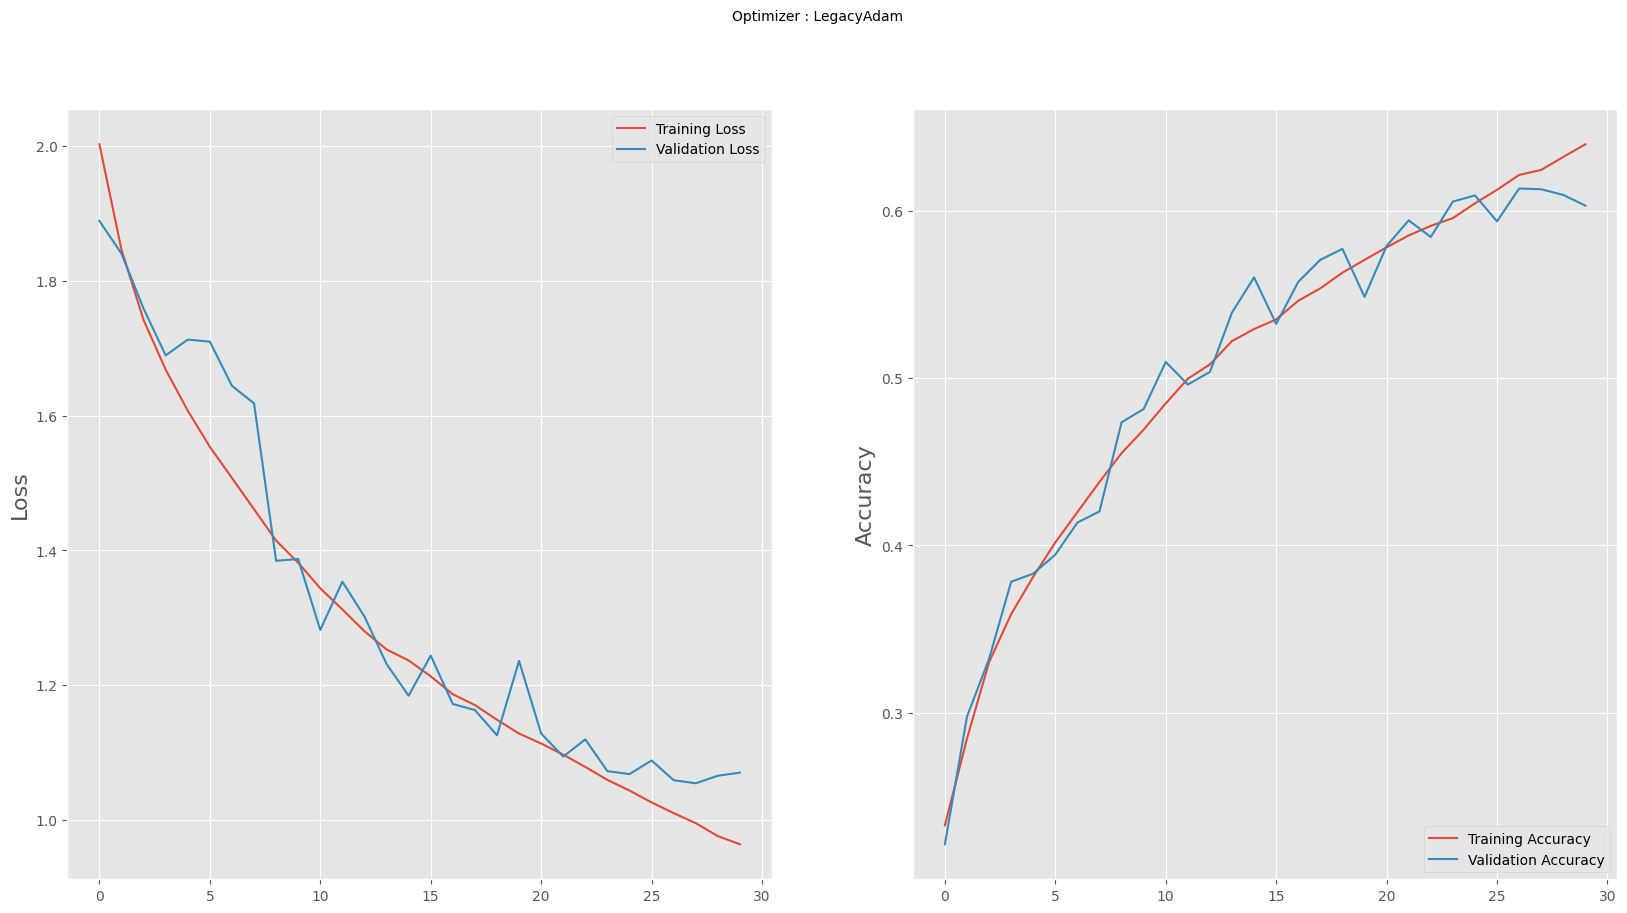

In [13]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : LegacyAdam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


